# Unsupervised Machine Learning - Clustering
****

 ### Clustering in Machine Learning
 Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group.

* Links related to clustering:

    * https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68#:~:text=Clustering%20is%20a%20Machine%20Learning,the%20grouping%20of%20data%20points.&text=In%20theory%2C%20data%20points%20that,dissimilar%20properties%20and%2For%20features.
    
    * https://machinelearningmastery.com/clustering-algorithms-with-python/
    
   
* Clustering accuracy: https://smorbieu.gitlab.io/accuracy-from-classification-to-clustering-evaluation/

# Sklearn Clustering Section link:

1. https://scikit-learn.org/stable/modules/clustering.html


Must read..!!

![](https://github.com/ShrikantUppin/Clustering-With-all-types/blob/Data/sklearn%20classes%20for%20clustering.png?raw=true)

![](https://github.com/ShrikantUppin/Clustering-With-all-types/blob/Data/class%20function%20to%20use.png?raw=true)

# Problem Statement.

 ***
 ### Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. 

 #### Draw the inferences from the clusters obtained.
***

 ### Data Description:
 
 #### <p align='justify'> The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers </p>

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

For this analysis, please be sure to select all other variables except for ID and Award in your column selection. Select the number of clusters to be 7 (seven).

1. Which cluster has the most number of customers?

2. List the characteristics of one customer in each cluster.

3. What is your interpretation of these cluster results?

4. Please describe the characteristics of the first cluster (cluster #0)

5. Which cluster has the highest balance average? Why do you think it is the highest? Base your opinion on the cluster’s characteristics.

6. Which cluster has the lowest balance average? Why do you think it is the lowest? Base your opinion on the cluster’s characteristics.

7. To improve your analysis, what missing dimension would you add to your data set? Why?

# Step 1: Import Required Libraries..

In [1]:
# Importing basic libraries..All other libraries are mentioned at respective step/code cells.

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Data Loading & Preprocessing.

In [2]:
dataset = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [3]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
# Dataset column renaming

dataset.columns = ['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 
                 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll', 'Award'] 

# use dataset.keys() or dataset.columns to get cloumn name list

In [6]:
# Checking dataset types, datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
dataset.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
# writing loop to check datatype other than integer, if found any that will be replaced by Nan.

def column_preprocessor(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [9]:
column_preprocessor(dataset[dataset.columns])

In [10]:
dataset.isna().any().sum()

0

# Step 3: EDA

In [11]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [12]:
dataset.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


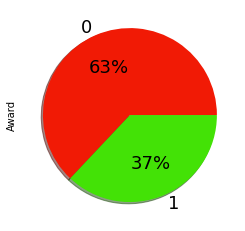

In [13]:
# Previously miles award status

dataset['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

Since from previous award status most of the customer not awarded with any schemes.

So will drop the 'Award' Column. in analysis add it on after cluster no. results.

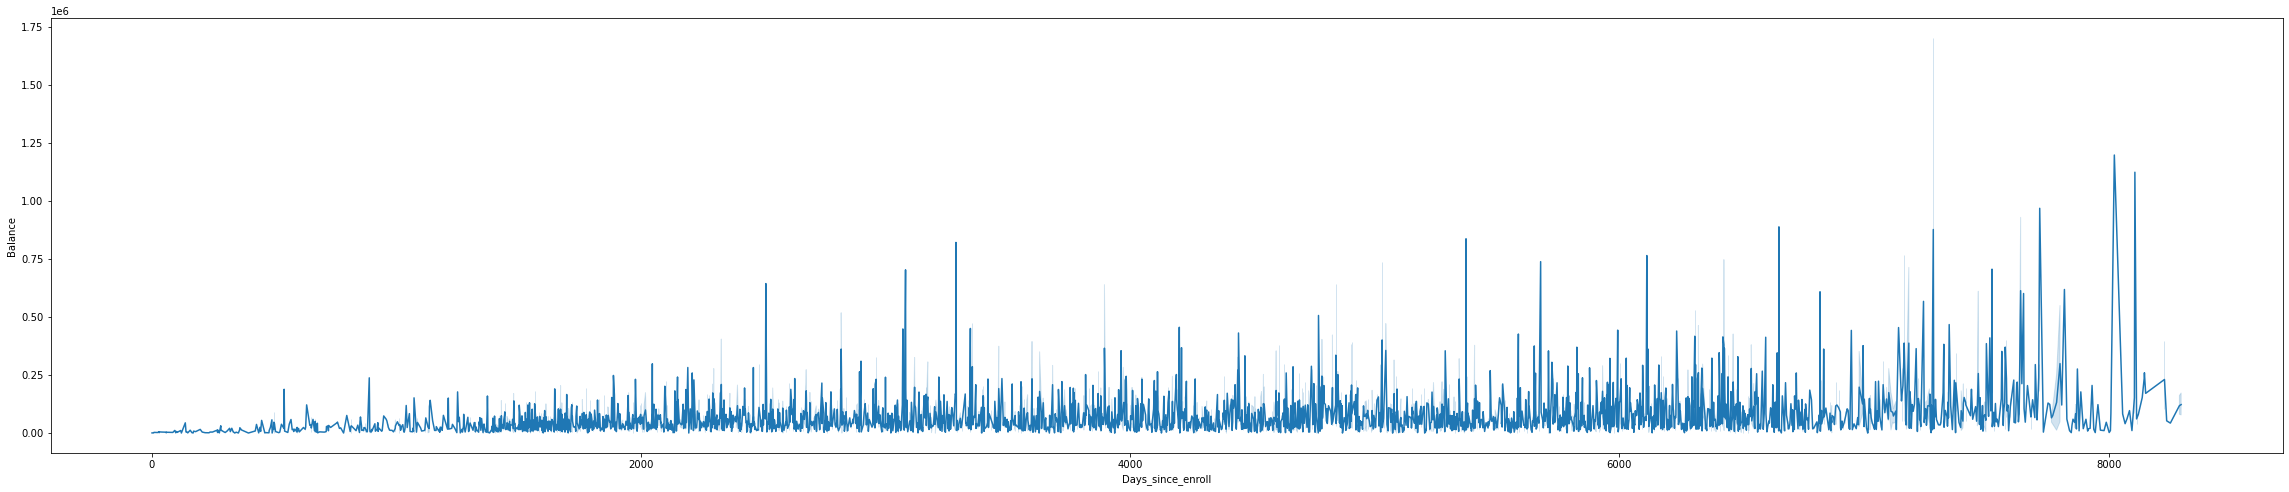

In [14]:
# Checking trend between balance miles & no. of days since enroll

fig, ax =plt.subplots(figsize=(40,8))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = dataset)

 Plot shows max enroll days will max miles balance.

 ## Correlation Matrix

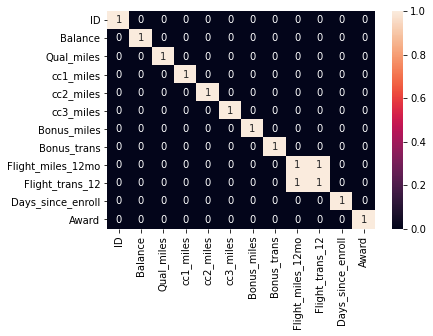

In [15]:
sns.heatmap(dataset.corr()>0.85, annot=True)

 Since there is no correlation between variables. So need not to go with PCA. Before applying clustering. For the First Stage.

# Step4: Data preprocessing part 2

In [81]:
# Here we will drop Columns ID & Award. Since they are not useful for data analysis

dataset1 = dataset.drop(['ID','Award'],axis=1)

In [82]:
# Standardization of dataset1

from sklearn.preprocessing import StandardScaler
dataset1_std = StandardScaler().fit_transform(dataset1)

In [83]:
dataset1_std

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

# PCA

## Note: Outlier detection

1. https://www.digitalvidya.com/blog/outlier-detection/


2. https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

Note: K-means clustering algorithm

The K-means clustering algorithm is sensitive to outliers, because a mean is easily influenced by extreme values. K-medoids clustering is a variant of K-means that is more robust to noises and outliers.

# Clustering

## 1. DBscan Clustering..outlier Detection

DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).


1. https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/#:~:text=Two%20important%20parameters%20are%20required,neighbors%20within%20%E2%80%9Ceps%E2%80%9D%20radius.


2. https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf


3. Outlier Effects: https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

This Outlier Detection technique is based on the DBSCAN clustering method. DBSCAN is a nonparametric, density-based outlier detection method in a one or multi-dimensional feature space.


#### Note: Must Read.
The key difference between parametric and nonparametric test is that the parametric test relies on statistical distributions in data whereas nonparametric do not depend on any distribution. Non-parametric does not make any assumptions and measures the central tendency with the median value.

 ### DBscan Hyper parameter tunning:


In [84]:
# though there are diff ways to tune parameter..this loop will give a best insight.

from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = np.arange(0.2,1.0,0.1) 
min_samples = np.arange(2,5) 
dbscan_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []
epsvalues = []
min_samp = []
noise_points = []

for p in dbscan_params:
    dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(dataset1_std)
    epsvalues.append(p[0])
    min_samp.append(p[1])
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))
    sil_score.append(silhouette_score(dataset1_std, dbscan_cluster.labels_))
    noise_points.append(list(dbscan_cluster.labels_).count(-1))
    
eps_min = list(zip(no_of_clusters, sil_score, epsvalues, min_samp,noise_points ))
eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_samples', 'noise_Points'])

eps_min_df


# ref: https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31

,no_of_clusters,silhouette_score,epsilon_values,minimum_samples,noise_Points
0,197,-0.505759,0.2,2,2251
1,72,-0.531958,0.2,3,2501
2,32,-0.525926,0.2,4,2679
3,155,-0.460417,0.3,2,1638
4,61,-0.459805,0.3,3,1826
5,21,-0.413318,0.3,4,2007
6,119,-0.380262,0.4,2,1222
7,41,-0.307614,0.4,3,1378
8,20,-0.272489,0.4,4,1485
9,95,-0.258999,0.5,2,939


In [85]:
# Filtering result dataframe by silhoutte score. Max. the score better the parameters..
# In practical case studies no. of cluster should be minimum..this is also one of crieteria..

eps_min_df.loc[eps_min_df['silhouette_score'] ==max(eps_min_df.silhouette_score)]

,no_of_clusters,silhouette_score,epsilon_values,minimum_samples,noise_Points
20,7,0.155739,0.8,4,629


In [86]:
# From above we have got epsilon_values = 0.8, min_samples = 4 for DBscan.

# Note: We will agian perform DBscan & plot the points. then will go for KMeans.

In [88]:
from sklearn.cluster import DBSCAN

DB = DBSCAN(eps=0.8, min_samples=4)
DB.fit(dataset1_std)
y_pred = DB.fit_predict(dataset1_std)

In [99]:
# Converting lable arrays into dataframe.

DB_Cluster=pd.DataFrame(DB.labels_,columns=['DB_cluster'])

In [104]:
# Checking cluster numbering..

DB_Cluster.DB_cluster.value_counts()

# Note: -1 cluster indicates noise cluster.. all points from -1 will be outliers

 0    3332
-1     629
 1      15
 5       9
 2       6
 4       5
 3       3
Name: DB_cluster, dtype: int64

In [105]:
# Concating DBscan clustering predicted cluster dataframe tp dataset

result_DB = pd.concat([dataset,DB_Cluster],axis=1)

In [106]:
result_DB.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DB_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
